In [1]:
from astropy.wcs import WCS
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
from astropy import units as u

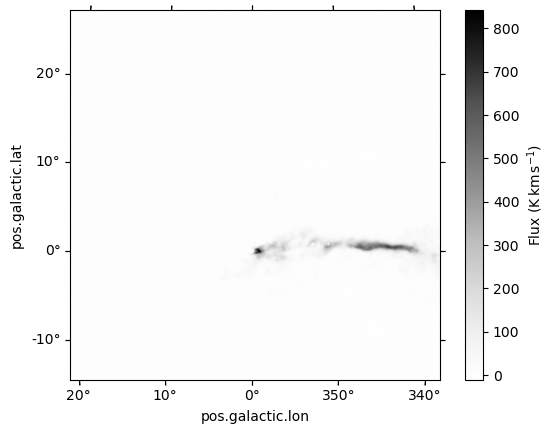

In [2]:
hdu=fits.open('/DATA/zj/fast_hivc/HI4PI/cdsarc.u-strasbg.fr/0/more/HI4PI/ALLSKY/GAL/AIT.fits')
wcs_galactic_t=WCS(hdu[0].header).dropaxis(2)
raidxrang=[800,1300]
decidxrang=[1700,2200]
wcs_galactic=wcs_galactic_t[raidxrang[0]:raidxrang[1],decidxrang[0]:decidxrang[1]]
def draw(data):
    plt.figure()
    ax=plt.subplot(projection=wcs_galactic)
    plt.imshow(data,cmap='Greys',origin='lower')
    cbar=plt.colorbar()
    cbar.set_label(r'Flux ($\rm K\,km\,s^{-1}$)')
data=hdu[0].data
draw(np.sum(data[330:364,raidxrang[0]:raidxrang[1],decidxrang[0]:decidxrang[1]],axis=0)*1.3)

In [2]:
hdulmmt0=fits.open('moment0_combined.fits')
wcs_icrs=WCS(hdulmmt0[0].header)
def draw(data):
    plt.figure()
    ax=plt.subplot(projection=wcs_icrs)
    #print(ax.get_transform('galactic'))
    plt.imshow(data,origin='lower')
    cbar=plt.colorbar()
    cbar.set_label(r'Flux ($\rm K\,km\,s^{-1}$)')
draw(hdulmmt0[0].data)

FileNotFoundError: [Errno 2] No such file or directory: 'moment0_combined.fits'

In [2]:
def icrs2galac(radec):
    c = SkyCoord(ra=radec[0],dec=radec[1], frame='icrs',unit=u.deg).galactic
    return c
hdr=hdulmmt0[0].header
detpixs=np.where(~np.isnan(hdulmmt0[0].data))
ras=(detpixs[1]-hdr['CRPIX1'])*hdr['CDELT1']+hdr['CRVAL1']
decs=(detpixs[0]-hdr['CRPIX2'])*hdr['CDELT2']+hdr['CRVAL2']
galcord=[]
for i in range(len(ras)):
    galcord.append(icrs2galac((ras[i],decs[i])))

NameError: name 'hdulmmt0' is not defined

In [5]:
raidxrang=[800,1300]
decidxrang=[1700,2500]
wcs_galactic=wcs_galactic_t[raidxrang[0]:raidxrang[1],decidxrang[0]:decidxrang[1]]
galpix=[]
for i in range(len(ras)):
    galpix.append(wcs_galactic.world_to_pixel(galcord[i]))
galpix=np.array(galpix) 

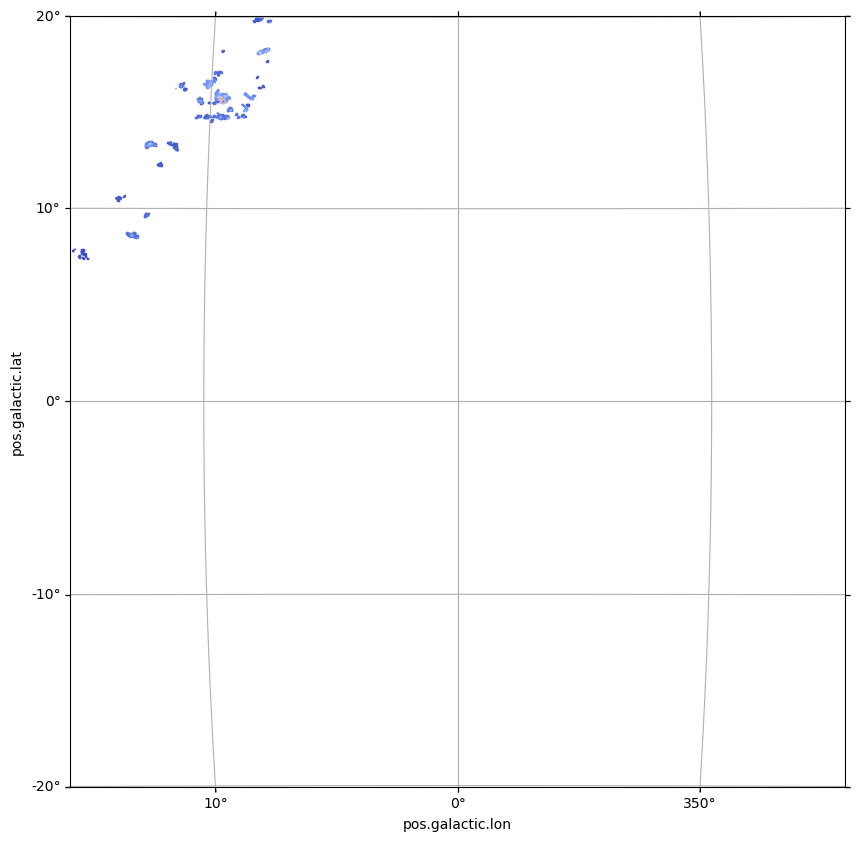

In [6]:
def draw(data):
    plt.figure(figsize=[10,10])
    ax=plt.subplot(projection=wcs_galactic)
    #print(ax.get_transform('galactic'))
    #plt.imshow(data,origin='lower')
    ax.scatter(galpix[:,0],galpix[:,1],c=hdulmmt0[0].data[detpixs],cmap='coolwarm',vmin=0,
               vmax=np.max(hdulmmt0[0].data[detpixs]),s=0.1,marker='s')
    ax.grid(True)
    pix1=wcs_galactic.world_to_pixel(SkyCoord(frame='galactic',l=16,b=-20,unit=u.deg))
    pix2=wcs_galactic.world_to_pixel(SkyCoord(frame='galactic',l=-16,b=20,unit=u.deg))
    plt.ylim(pix1[1],pix2[1])
    plt.xlim(pix1[0],pix2[0])
    #cbar=plt.colorbar()
    #cbar.set_label(r'Flux ($\rm K\,km\,s^{-1}$)')
draw(hdulmmt0[0].data)

In [7]:
np.min(abs(np.diff(np.array(galpix),axis=0)),axis=0)

array([0.11597096, 0.05814098])

In [8]:
import fitz
doc=fitz.open('pdf_imgs/clouds.pdf')

In [9]:
imgids=doc[0].get_images()
imgboxs=[]
for i in range(len(imgids)):
    img=doc.extract_image(imgids[i][0])
    imgout=open('pdf_imgs/subimg_%i.'%i+img['ext'],'wb')
    imgout.write(img['image'])
    imgout.close()
    imgboxs.append(doc[0].get_image_bbox(imgids[i][7]))

In [10]:
dwgs=doc[0].get_drawings()
pts=[]
for i in range(len(dwgs)):
    for item in dwgs[i]['items']:
        if item[0]=='l':
            pts.append(item[1])
            pts.append(item[2])
pts=np.array(pts)

In [11]:
#plt.scatter(pts[:,0],-pts[:,1],s=1)
idx=(pts[:,0]<60)*(pts[:,0]>40)
idx=idx*(pts[:,1]<90)*(pts[:,1]>70)
#plt.scatter(pts[idx,0],-pts[idx,1],s=1)
#plt.xlim(40,60)
fig1x1=pts[idx][2,0]
fig1y2=pts[idx][5,1]

In [12]:
#plt.scatter(pts[:,0],-pts[:,1],s=1)
idx=(pts[:,0]<350)*(pts[:,0]>320)
idx=idx*(pts[:,1]<370)*(pts[:,1]>350)
fig1x2=pts[idx][2,0]
fig1y1=pts[idx][5,1]
#plt.scatter(pts[idx,0],-pts[idx,1],s=1)
#plt.vlines(fig1x2,ymin=-fig1y1,ymax=-fig1y2)

In [13]:
#plt.scatter(pts[:,0],-pts[:,1],s=1)
idx=(pts[:,0]<370)*(pts[:,0]>350)
idx=idx*(pts[:,1]<90)*(pts[:,1]>70)
fig2x1=pts[idx][2,0]
fig21dx=fig2x1-fig1x1
#plt.scatter(pts[idx,0],-pts[idx,1],s=1)

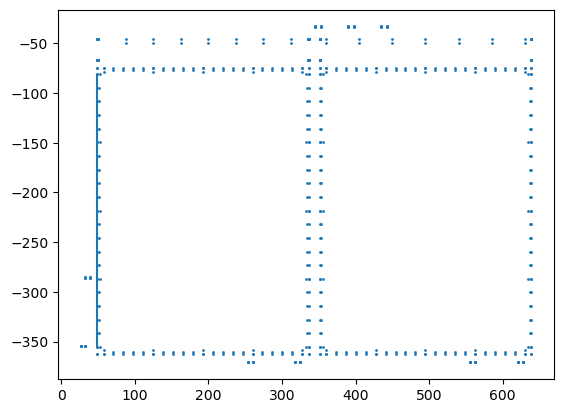

In [14]:
plt.scatter(pts[:,0],-pts[:,1],s=1)
plt.vlines(48.62187576293945,ymin=-fig1y1,ymax=-fig1y2)

In [15]:
imgboxs

[Rect(351.0218811035156, 73.67999267578125, 639.7418823242188, 362.3999938964844),
 Rect(351.3599853515625, 44.6400146484375, 639.3599853515625, 66.24002075195312),
 Rect(48.62187576293945, 73.67999267578125, 337.3418884277344, 362.3999938964844),
 Rect(48.959999084472656, 44.6400146484375, 336.9599914550781, 66.24002075195312)]

In [16]:
fig1pixmap=fitz.Pixmap('pdf_imgs/subimg_2.png')
pixcube1=np.zeros([fig1pixmap.width,fig1pixmap.height,3])
for i in range(pixcube1.shape[0]):
    for j in range(pixcube1.shape[1]):
        pixcube1[i,j]=fig1pixmap.pixel(i,j)

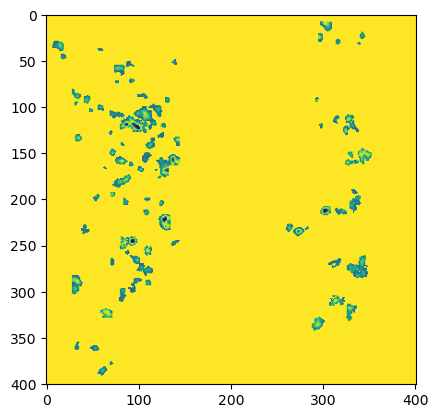

In [17]:
plt.imshow(pixcube1[:,:,2])

In [18]:
fig1cbar=fitz.Pixmap('pdf_imgs/subimg_3.png')
pixcbar1=np.zeros([fig1cbar.width,fig1cbar.height,3])
for i in range(pixcbar1.shape[0]):
    for j in range(pixcbar1.shape[1]):
        pixcbar1[i,j]=fig1cbar.pixel(i,j)

In [19]:
tmp=np.zeros([pixcbar1.shape[0]])
cbarnorm=pixcbar1[:,0,:]
cbarnorm=(cbarnorm.T/np.sum(cbarnorm,axis=1)).T
cubeidx=np.where(np.sum(pixcube1,axis=2)!=255*3)
cubecoloridx=np.zeros([fig1pixmap.width,fig1pixmap.height])
cubecoloridx[:,:]=np.nan
for i in range(len(cubeidx[0])):
    color=pixcube1[cubeidx[0][i],cubeidx[1][i]]
    colornorm=color/np.sum(color)
    for k in range(pixcbar1.shape[0]):
        tmp[k]=np.sum(abs(colornorm-cbarnorm[k]))
    idxtmp=np.argmin(tmp)
    cubecoloridx[cubeidx[0][i],cubeidx[1][i]]=idxtmp

In [20]:
imgboxs[3]

Rect(48.959999084472656, 44.6400146484375, 336.9599914550781, 66.24002075195312)

In [21]:
#plt.scatter(pts[:,0],-pts[:,1],s=1)
idx=(pts[:,0]<100)*(pts[:,0]>80)
idx=idx*(pts[:,1]<60)*(pts[:,1]>30)
#plt.scatter(pts[idx,0],-pts[idx,1],s=1)
fig1cbar0p5=pts[idx][0][0]
idx=(pts[:,0]<320)*(pts[:,0]>300)
idx=idx*(pts[:,1]<60)*(pts[:,1]>30)
#plt.scatter(pts[idx,0],-pts[idx,1],s=1)
fig1cbar3p5=pts[idx][0][0]

In [22]:
cdelt=(3.5-0.5)/(fig1cbar3p5-fig1cbar0p5)
crval=0.5
crpix=fig1cbar0p5
d=(imgboxs[3][2]-imgboxs[3][0])/(pixcbar1.shape[0]+1)
caxis=np.linspace(imgboxs[3][0]+d/2,imgboxs[3][2]-d/2,pixcbar1.shape[0])
caxis=(caxis-crpix)*cdelt+crval

In [23]:
cube1=cubecoloridx*1
for i in range(len(cubeidx[0])):
    cube1[cubeidx[0][i],cubeidx[1][i]]=caxis[int(cubecoloridx[cubeidx[0][i],cubeidx[1][i]])]

In [24]:
cdelt=-(10+10)/(fig1x2-fig1x1)
crval=-10
crpix=fig1x1
d=(imgboxs[2][2]-imgboxs[2][0])/(pixcube1.shape[0])
xaxis=np.linspace(imgboxs[2][0]+d/2,imgboxs[2][2]-d/2,pixcube1.shape[0])
xaxis=(xaxis-crpix)*cdelt+crval

In [25]:
cdelt=(10+10)/(fig1y2-fig1y1)
crval=-10
crpix=fig1y1
d=(imgboxs[2][3]-imgboxs[2][1])/(pixcube1.shape[1]+1)
yaxis=np.linspace(imgboxs[2][3]+d/2,imgboxs[2][1]-d/2,pixcube1.shape[1])
yaxis=(yaxis-crpix)*cdelt+crval

In [26]:
hduout=fits.PrimaryHDU(np.flip(cube1.T,0))
hduout.header['CDELT1']=xaxis[1]-xaxis[0]
hduout.header['CRVAL1']=0
hduout.header['CRPIX1']=201
hduout.header['CDELT2']=yaxis[1]-yaxis[0]
hduout.header['CRVAL2']=0
hduout.header['CRPIX2']=201
hduout.header['CTYPE1']='GLON-AIT'
hduout.header['CTYPE2']='GLAT-AIT'
hduout.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  401                                                  
NAXIS2  =                  401                                                  
EXTEND  =                    T                                                  
CDELT1  = -0.05331993165252236                                                  
CRVAL1  =                    0                                                  
CRPIX1  =                  201                                                  
CDELT2  =  0.05268889114825903                                                  
CRVAL2  =                    0                                                  
CRPIX2  =                  201                                                  
CTYPE1  = 'GLON-AIT'        

In [28]:
galpix=[]
wcs_gbt=WCS(hduout.header)
for i in range(len(ras)):
    galpix.append(wcs_gbt.world_to_pixel(galcord[i]))
galpix=np.array(galpix) 

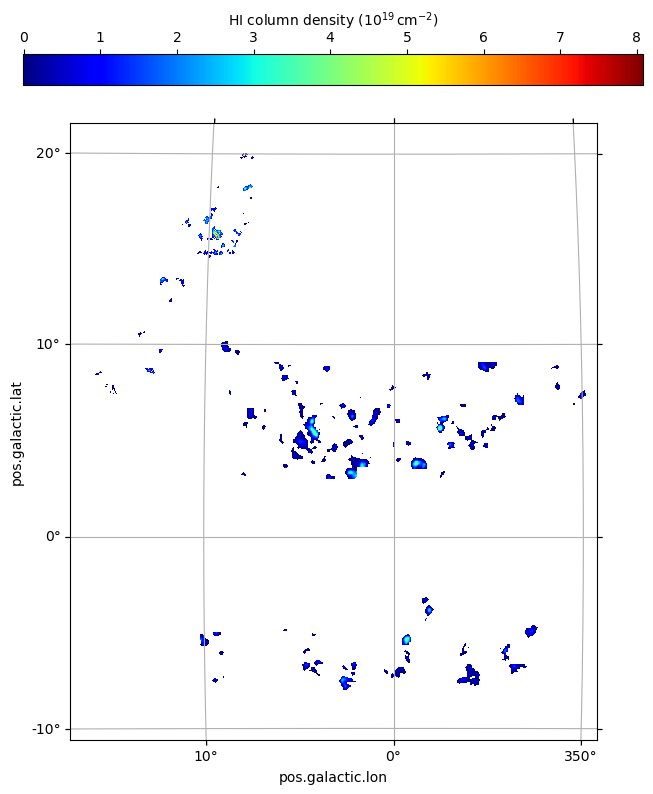

In [44]:
import regions
from regions import PixCoord,PolygonPixelRegion
hdulmmt0=fits.open('moment0_combined.fits')
hduout=fits.open('GBT_mmt0.fits')[0]
def draw(data):
    plt.figure(figsize=[8,10])
    ax=plt.subplot(projection=wcs_gbt)
    cmap='jet'
    fastdata=hdulmmt0[0].data[detpixs]*1.82e18/1e19
    cmin=min(np.nanmin(fastdata),np.nanmin(data))
    cmax=max(np.nanmax(fastdata),np.nanmax(data))
    plt.imshow(data,origin='lower',cmap=cmap)
    plt.clim(cmin,cmax)
    ax.scatter(galpix[:,0],galpix[:,1],c=fastdata,cmap=cmap,vmin=cmin,
               vmax=cmax,s=0.19,marker='s',edgecolors='none')
    ax.grid(True)
    cbar=plt.colorbar(location='top')
    cbar.set_label(r'HI column density ($10^{19}\,\rm cm^{-2})$')
    #regs=regions.Regions.read('pdf_imgs/Fermi.crtf')
    #reg_plot = PolygonPixelRegion(vertices=regs[0].to_pixel(wcs_gbt).vertices)
    #patch = reg_plot.plot(ax=ax, facecolor='none', edgecolor='k', lw=2, label='Polygon')
    #reg_plot = PolygonPixelRegion(vertices=regs[1].to_pixel(wcs_gbt).vertices)
    #patch = reg_plot.plot(ax=ax, facecolor='none', edgecolor='k', lw=2, label='Polygon')
draw(hduout.data)
plt.savefig('mmt0_comb.pdf')
hdulout=fits.HDUList([hduout])
hdulout.writeto('GBT_mmt0.fits',overwrite=True)

In [ ]:
np.min(abs(np.diff(galpix[:,0])))


In [ ]:
wcs_galactic_t

In [513]:
wcs_gbt

WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-AIT'  'GLAT-AIT'  
CRVAL : 0.0  0.0  
CRPIX : 201.0  201.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.05331993165252236  0.05268889114825903  
NAXIS : 401  401

In [478]:
fig2pixmap=fitz.Pixmap('pdf_imgs/subimg_0.png')
pixcube2=np.zeros([fig2pixmap.width,fig2pixmap.height,3])
for i in range(pixcube2.shape[0]):
    for j in range(pixcube2.shape[1]):
        pixcube2[i,j]=fig2pixmap.pixel(i,j)

fig2cbar=fitz.Pixmap('pdf_imgs/subimg_1.png')
pixcbar2=np.zeros([fig2cbar.width,fig2cbar.height,3])
for i in range(pixcbar2.shape[0]):
    for j in range(pixcbar2.shape[1]):
        pixcbar2[i,j]=fig2cbar.pixel(i,j)

tmp=np.zeros([pixcbar2.shape[0]])
cbarnorm=pixcbar2[:,0,:]
cbarnorm=(cbarnorm.T/np.sum(cbarnorm,axis=1)).T
cubeidx=np.where(np.sum(pixcube2,axis=2)!=255*3)
cubecoloridx=np.zeros([fig2pixmap.width,fig2pixmap.height])
cubecoloridx[:,:]=np.nan
for i in range(len(cubeidx[0])):
    color=pixcube2[cubeidx[0][i],cubeidx[1][i]]
    colornorm=color/np.sum(color)
    for k in range(pixcbar1.shape[0]):
        tmp[k]=np.sum(abs(colornorm-cbarnorm[k]))
    idxtmp=np.argmin(tmp)
    cubecoloridx[cubeidx[0][i],cubeidx[1][i]]=idxtmp

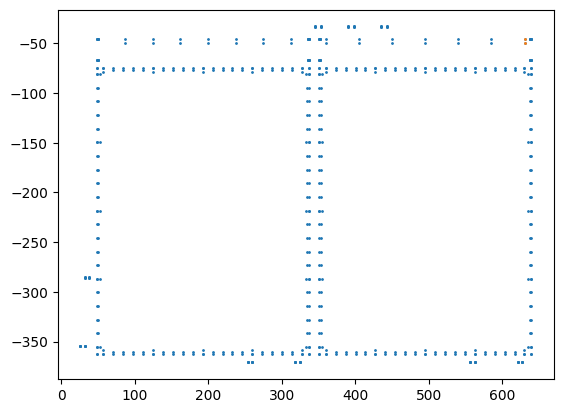

In [479]:
plt.scatter(pts[:,0],-pts[:,1],s=1)
idx=(pts[:,0]<370)*(pts[:,0]>360)
idx=idx*(pts[:,1]<60)*(pts[:,1]>30)
#plt.scatter(pts[idx,0],-pts[idx,1],s=1)
fig2cbar_300=pts[idx][0][0]
idx=(pts[:,0]<635)*(pts[:,0]>620)
idx=idx*(pts[:,1]<60)*(pts[:,1]>30)
plt.scatter(pts[idx,0],-pts[idx,1],s=1)
fig2cbar300=pts[idx][0][0]

In [480]:
cdelt=(300+300)/(fig2cbar300-fig2cbar_300)
crval=0
crpix=(fig2cbar300+fig2cbar_300)/2
d=(imgboxs[1][2]-imgboxs[1][0])/(pixcbar2.shape[0]+1)
caxis=np.linspace(imgboxs[1][0]+d/2,imgboxs[1][2]-d/2,pixcbar2.shape[0])
caxis=(caxis-crpix)*cdelt+crval

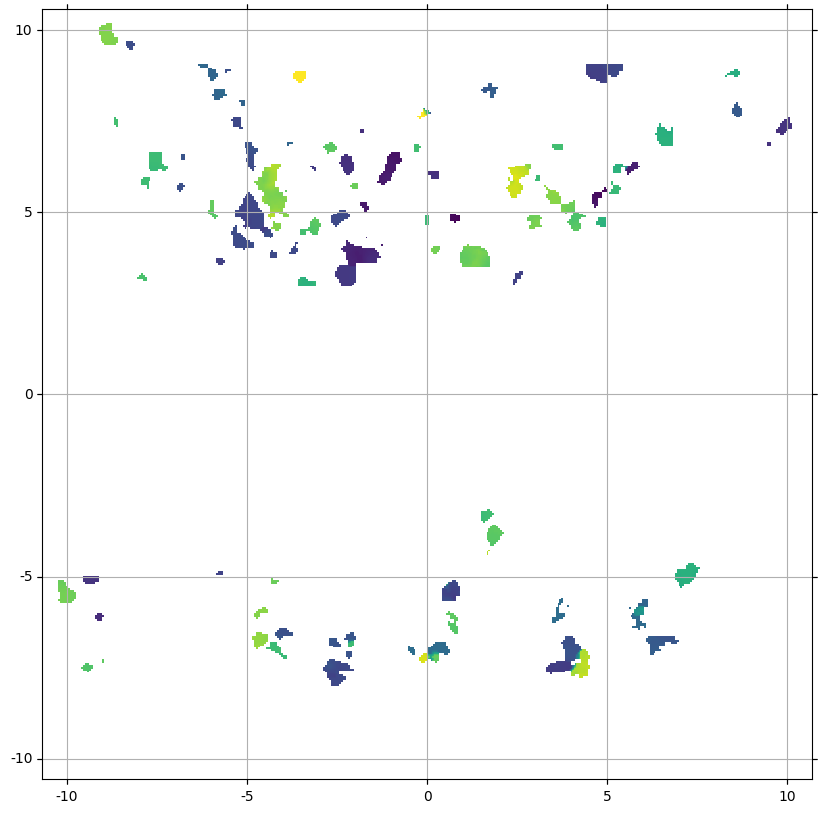

In [481]:
cube2=cubecoloridx*1
for i in range(len(cubeidx[0])):
    cube2[cubeidx[0][i],cubeidx[1][i]]=caxis[int(cubecoloridx[cubeidx[0][i],cubeidx[1][i]])]

hduout=fits.PrimaryHDU(np.flip(cube2.T,0))
hduout.header['CDELT1']=xaxis[1]-xaxis[0]
hduout.header['CRVAL1']=0
hduout.header['CRPIX1']=201
hduout.header['CDELT2']=yaxis[1]-yaxis[0]
hduout.header['CRVAL2']=0
hduout.header['CRPIX2']=201
hduout.header

wcs_gbt=WCS(hduout.header)
def draw(data):
    plt.figure(figsize=[10,10])
    ax=plt.subplot(projection=wcs_gbt)
    plt.imshow(data,origin='lower')
    ax.grid(True)
draw(hduout.data)
hdulout=fits.HDUList([hduout])
hdulout.writeto('GBT_mmt1.fits',overwrite=True)

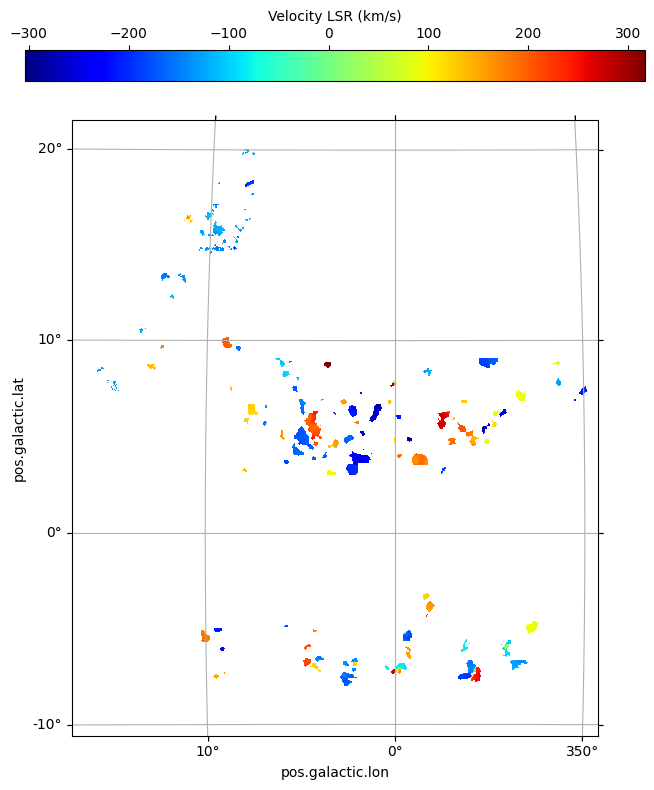

In [571]:
hdulmmt1=fits.open('moment1_combined.fits')
hduout=fits.open('GBT_mmt1.fits')[0]
def draw(data):
    plt.figure(figsize=[8,10])
    ax=plt.subplot(projection=wcs_gbt)
    cmap='jet'
    fastdata=hdulmmt1[0].data[detpixs]
    cmin=min(np.nanmin(fastdata),np.nanmin(data))
    cmax=max(np.nanmax(fastdata),np.nanmax(data))
    plt.imshow(data,origin='lower',cmap=cmap)
    plt.clim(cmin,cmax)
    ax.scatter(galpix[:,0],galpix[:,1],c=fastdata,cmap=cmap,vmin=cmin,
               vmax=cmax,s=0.19,marker='s',edgecolors='none')
    ax.grid(True)
    cbar=plt.colorbar(location='top')
    cbar.set_label('Velocity LSR (km/s)')
draw(hduout.data)
plt.savefig('mmt1_comb.pdf')
hdulout=fits.HDUList([hduout])
hdulout.writeto('GBT_mmt1.fits',overwrite=True)